<a href="https://colab.research.google.com/github/MamMates/ml-food-price/blob/main/MamMates_Food_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import

In [ ]:
!pip install scikit-learn==1.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 36.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tempfile
from sklearn.metrics import mean_absolute_error
import joblib
%matplotlib inline

In [ ]:
import sklearn
sklearn.__version__

'1.3.2'

## Data Preprocessing

In [ ]:
dataset_link = "https://docs.google.com/spreadsheets/d/1e_aUUmqyBmFP15BlJCKY-MHv5YFRTRROBEjk1ArDT84"

df_dataset = pd.read_csv(f'{dataset_link}/export?gid=261629379&format=csv')
df_dataset

,name,province,environment,rating,price
0,roti cokelat,17.0,2.0,3.0,"Rp11,000"
1,roti kukus cokelat,17.0,2.0,3.0,"Rp15,000"
2,roti panggang cokelat,17.0,2.0,3.0,"Rp15,000"
3,roti bakar cokelat,17.0,2.0,3.0,"Rp23,500"
4,roti tawar,17.0,2.0,3.0,"Rp26,000"
...,...,...,...,...,...
348,roti keju,16.0,3.0,3.0,"Rp5,400"
349,roti tawar,16.0,3.0,3.0,"Rp16,000"
350,roti tawar,16.0,3.0,3.0,"Rp25,000"
351,roti kukus srikaya,16.0,3.0,3.0,"Rp7,000"


In [ ]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         342 non-null    object 
 1   province     342 non-null    float64
 2   environment  342 non-null    float64
 3   rating       339 non-null    float64
 4   price        335 non-null    object 
dtypes: float64(3), object(2)
memory usage: 13.9+ KB


In [ ]:
df_dataset.isna().sum()

name           11
province       11
environment    11
rating         14
price          18
dtype: int64

In [ ]:
def clean_dataset(df):
  df.dropna(how='all', inplace=True)
  df['rating'].ffill(inplace=True)
  df['rating'] = df['rating'].astype(np.int32)
  df['environment'] = df['environment'].astype(np.int32)

  df['price'] = df['price'].replace('[^\d]', '', regex=True)
  df['price'] = df['price'].replace('', np.nan)
  df['price'] = df['price'].astype(np.float32)
  df['price'].ffill(inplace=True)

  df['province'] = df['province'].astype(np.int32)
  return df


In [ ]:
df_dataset = clean_dataset(df_dataset)
df_dataset

,name,province,environment,rating,price
0,roti cokelat,17,2,3,11000.0
1,roti kukus cokelat,17,2,3,15000.0
2,roti panggang cokelat,17,2,3,15000.0
3,roti bakar cokelat,17,2,3,23500.0
4,roti tawar,17,2,3,26000.0
...,...,...,...,...,...
348,roti keju,16,3,3,5400.0
349,roti tawar,16,3,3,16000.0
350,roti tawar,16,3,3,25000.0
351,roti kukus srikaya,16,3,3,7000.0


In [ ]:
df_salary = pd.read_csv(f'{dataset_link}/export?gid=533543368&format=csv', index_col='id')
df_salary.head()

,province,salary
id,,
1,Nanggroe Aceh Darussalam (Ibu Kota Banda Aceh),3.413.666
2,Sumatera Utara (Ibu Kota Medan),2.710.493
3,Sumatera Selatan (Ibu Kota Palembang),3.404.177
4,Sumatera Barat (Ibu Kota Padang),2.742.476
5,Bengkulu (Ibu Kota Bengkulu),2.418.280


In [ ]:
df_salary['salary'] = df_salary['salary'].replace('[^\d]', '', regex=True)
df_salary['salary'] = df_salary['salary'].astype(np.float32)

In [ ]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 1 to 38
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   province  38 non-null     object 
 1   salary    38 non-null     float32
dtypes: float32(1), object(1)
memory usage: 760.0+ bytes


In [ ]:
df_merged = pd.merge(df_dataset, df_salary, left_on='province', right_on='id', how='inner')
df_merged

,name,province_x,environment,rating,price,province_y,salary
0,roti cokelat,17,2,3,11000.0,DKI Jakarta (Ibu Kota Jakarta),4900798.0
1,roti kukus cokelat,17,2,3,15000.0,DKI Jakarta (Ibu Kota Jakarta),4900798.0
2,roti panggang cokelat,17,2,3,15000.0,DKI Jakarta (Ibu Kota Jakarta),4900798.0
3,roti bakar cokelat,17,2,3,23500.0,DKI Jakarta (Ibu Kota Jakarta),4900798.0
4,roti tawar,17,2,3,26000.0,DKI Jakarta (Ibu Kota Jakarta),4900798.0
...,...,...,...,...,...,...,...
337,roti keju,16,3,3,5400.0,Banten (Ibu Kota Serang),2661280.0
338,roti tawar,16,3,3,16000.0,Banten (Ibu Kota Serang),2661280.0
339,roti tawar,16,3,3,25000.0,Banten (Ibu Kota Serang),2661280.0
340,roti kukus srikaya,16,3,3,7000.0,Banten (Ibu Kota Serang),2661280.0


In [ ]:
df_merged.drop(columns=['province_x', 'province_y'], inplace=True)

In [ ]:
df_merged.head()

,name,environment,rating,price,salary
0,roti cokelat,2,3,11000.0,4900798.0
1,roti kukus cokelat,2,3,15000.0,4900798.0
2,roti panggang cokelat,2,3,15000.0,4900798.0
3,roti bakar cokelat,2,3,23500.0,4900798.0
4,roti tawar,2,3,26000.0,4900798.0


In [ ]:
unique_words = set(' '.join(df_merged['name']).split())

for word in unique_words:
    df_merged[f'name_{word}'] = df_merged['name'].apply(lambda x: 1 if word in x else 0)

df_merged.drop('name', axis=1, inplace=True)

In [ ]:
df_merged = pd.concat([df_merged, pd.get_dummies(df_merged['environment'], prefix='env')], axis=1)
df_merged.drop(columns='environment', inplace=True)

## Data Analysist

In [ ]:
df_merged.head()

,rating,price,salary,name_kukus,name_roti,name_cokelat,name_bakar,name_srikaya,name_tawar,name_panggang,name_keju,env_0,env_1,env_2,env_3
0,3,11000.0,4900798.0,0,1,1,0,0,0,0,0,0,0,1,0
1,3,15000.0,4900798.0,1,1,1,0,0,0,0,0,0,0,1,0
2,3,15000.0,4900798.0,0,1,1,0,0,0,1,0,0,0,1,0
3,3,23500.0,4900798.0,0,1,1,1,0,0,0,0,0,0,1,0
4,3,26000.0,4900798.0,0,1,0,0,0,1,0,0,0,0,1,0


## Modeling

In [ ]:
from sklearn.model_selection import train_test_split
X = df_merged.drop(columns='price').values
y = df_merged['price'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape, X_test.shape

((273, 14), (69, 14))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from keras.layers import Dense, Dropout
from keras import Sequential, Input

units = X_train.shape[1]

model = Sequential([
  Dense(units, activation='relu', input_shape=(X_train.shape[1],)),
  Dense(units, activation='relu'),
  Dense(units, activation='relu'),
  Dense(units, activation='relu'),
  Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                210       
                                                                 
 dense_1 (Dense)             (None, 14)                210       
                                                                 
 dense_2 (Dense)             (None, 14)                210       
                                                                 
 dense_3 (Dense)             (None, 14)                210       
                                                                 
 dense_4 (Dense)             (None, 1)                 15        
                                                                 
Total params: 855 (3.34 KB)
Trainable params: 855 (3.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='mse', metrics=['mae'])

## Train

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_mae',
                               mode='min',
                               patience=100,
                               restore_best_weights=True,
                               verbose=1
)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test,y_test),
    epochs=1000,
    callbacks=[early_stopping]
)

Epoch 1/1000
9/9 [==============================] - 2s 40ms/step - loss: 329313024.0000 - mae: 16568.2441 - val_loss: 326863936.0000 - val_mae: 16563.3125
Epoch 2/1000
9/9 [==============================] - 0s 7ms/step - loss: 329308736.0000 - mae: 16568.1133 - val_loss: 326859072.0000 - val_mae: 16563.1641
Epoch 3/1000
9/9 [==============================] - 0s 10ms/step - loss: 329303296.0000 - mae: 16567.9473 - val_loss: 326852416.0000 - val_mae: 16562.9629
Epoch 4/1000
9/9 [==============================] - 0s 9ms/step - loss: 329295712.0000 - mae: 16567.7207 - val_loss: 326843136.0000 - val_mae: 16562.6758
Epoch 5/1000
9/9 [==============================] - 0s 7ms/step - loss: 329285152.0000 - mae: 16567.3887 - val_loss: 326829216.0000 - val_mae: 16562.2520
Epoch 6/1000
9/9 [==============================] - 0s 9ms/step - loss: 329269216.0000 - mae: 16566.9062 - val_loss: 326808992.0000 - val_mae: 16561.6387
Epoch 7/1000
9/9 [==============================] - 0s 7ms/step - loss: 32

## Model Evaluation

In [ ]:
pred = model.predict(X_test)
mean_absolute_error(y_test, pred)

3/3 [==============================] - 0s 4ms/step


4552.714

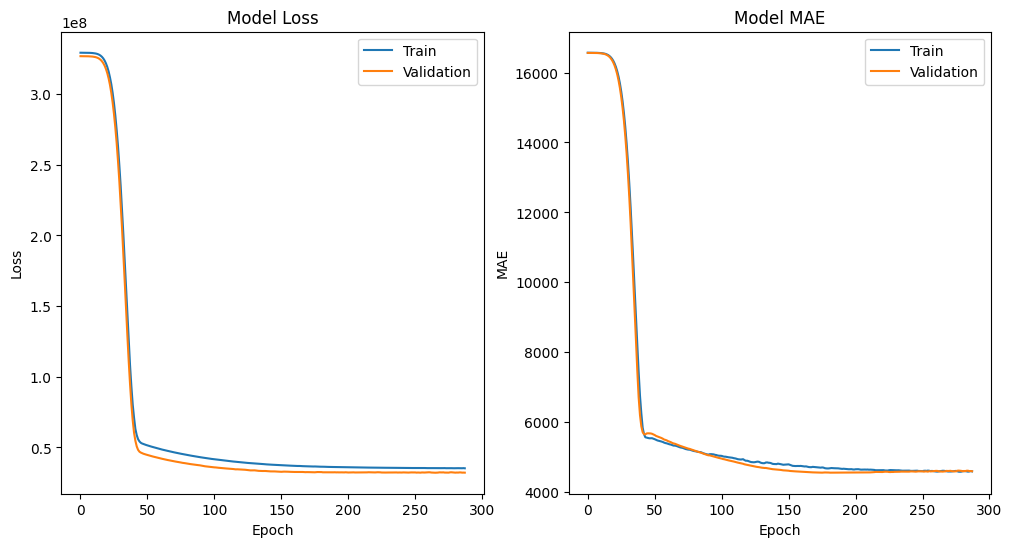

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(['Train', 'Validation'])

## Save Model

In [ ]:
MODEL_DIR = tempfile.gettempdir()
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

export_path = /tmp/1



In [ ]:
joblib.dump(scaler, f'{export_path}/scaler.pkl')

print('\nSaved model:')
!ls -l {export_path}


Saved model:
total 164
drwxr-xr-x 2 root root   4096 Dec 15 08:12 assets
-rw-r--r-- 1 root root     55 Dec 15 08:12 fingerprint.pb
-rw-r--r-- 1 root root  12624 Dec 15 08:12 keras_metadata.pb
-rw-r--r-- 1 root root 133681 Dec 15 08:12 saved_model.pb
-rw-r--r-- 1 root root   1223 Dec 15 08:12 scaler.pkl
drwxr-xr-x 2 root root   4096 Dec 15 08:12 variables


In [ ]:
!zip -r model.zip /tmp/1

  adding: tmp/1/ (stored 0%)
  adding: tmp/1/fingerprint.pb (stored 0%)
  adding: tmp/1/variables/ (stored 0%)
  adding: tmp/1/variables/variables.index (deflated 64%)
  adding: tmp/1/variables/variables.data-00000-of-00001 (deflated 38%)
  adding: tmp/1/assets/ (stored 0%)
  adding: tmp/1/scaler.pkl (deflated 61%)
  adding: tmp/1/saved_model.pb (deflated 88%)
  adding: tmp/1/keras_metadata.pb (deflated 90%)
